# Importing the modules


In [12]:
import os
import pandas as pd
import lyricsgenius as lg
import spotipy
import time
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [13]:
spotipy_client_id = 'c3e43077142f4e7bb70601747bd1f0d2'
spotipy_client_secret = '925f7025c8e6420f9be665401784c0f6'
spotipy_redirect_uri = 'https://google.com'
genius_access_token = 'jVHnDFkBvrvEsj_M8YUxbQ9t8mo2zIG19giBxlX_g7NeRz4W51gedM1YHTBX_U-4'

In [14]:
df = pd.read_excel('music.xlsx')

In [16]:
df['sentiment'].value_counts()

neg    50
pos    49
Name: sentiment, dtype: int64

In [17]:
df.head(3)

,Unnamed: 0,artists,track,mood,sentiment,lyrics
0,0,Usher,There Goes My Baby,relaxed,pos,There Goes My Baby Lyrics[Produced by Jim Jons...
1,1,Da'Ville,On My Mind,relaxed,pos,On My Mind LyricsAhhhhhhhh\nYou're om my mind\...
2,2,Rihanna,Rockstar 101,relaxed,pos,"ROCKSTAR 101 Lyrics[Intro]\nI told ya, I told ..."


# Plotting

Text(0.5, 0, 'Moods')

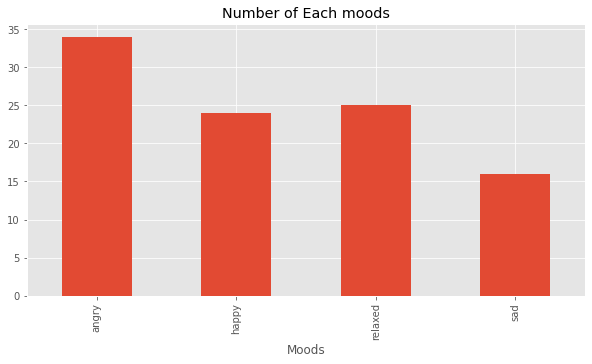

In [19]:
graph = df['mood'].value_counts().sort_index().plot(kind='bar',title='Number of Each moods',figsize=(10,5))
graph.set_xlabel('Moods')

# Genius API

In [20]:
genius = lg.Genius(genius_access_token)


In [ ]:
l=[]
for i in range(len(df['track'])):
  song = genius.search_song(title=df['track'][i],artist=df['artists'][i])
  if song != None:
    lyrics = song.lyrics
    l.append(lyrics)
  else:
    l.append(None)

lyrics_df = pd.DataFrame()
lyrics_df['lyrics'] = l

In [76]:
# join both data frames
df = pd.concat([df, lyrics_df], axis=1, join='inner')
df.head()

,artists,track,mood,sentiment,lyrics
0,Usher,There Goes My Baby,relaxed,pos,There Goes My Baby Lyrics[Produced by Jim Jons...
1,Da'Ville,On My Mind,relaxed,pos,On My Mind LyricsAhhhhhhhh\nYou're om my mind\...
2,Rihanna,Rockstar 101,relaxed,pos,"ROCKSTAR 101 Lyrics[Intro]\nI told ya, I told ..."
3,J. Holiday,Bed,relaxed,pos,Bed Lyrics[Written by The-Dream and Los Da Mys...
4,Morgan Heritage,Don't Haffi Dread,angry,neg,"Don’t Haffi Dread LyricsYeah, yeah, yeah - rag..."


In [77]:
df.to_excel('music.xlsx')

# <b>Data Preprocessing</b>

### <b>1.Data Cleaning</b>

#### Checking for missing values


In [22]:
df.isna().sum()

Unnamed: 0    0
artists       0
track         0
mood          0
sentiment     0
lyrics        2
dtype: int64

In [23]:
df.dropna(how='any',inplace=True)

#### Checking for Duplicate values

In [24]:
df['track'].duplicated().sum()


0

In [25]:
df.drop_duplicates(subset='track',keep='last',inplace=True)


In [26]:
df['sentiment'].value_counts()

neg    49
pos    48
Name: sentiment, dtype: int64

### <b>2.Tokenization</b>

In [27]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91635\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
def preprocessText(text, remove_stops=False):
    
    # Remove everything between hard brackets
    text = re.sub(pattern="\[.+?\]( )?", repl='', string=text)

    # Change "walkin'" to "walking", for example
    text = re.sub(pattern="n\\\' ", repl='ng ', string=text)

    # Remove x4 and (x4), for example
    text = re.sub(pattern="(\()?x\d+(\))?", repl=' ', string=text)

    # Fix apostrophe issues
    text= re.sub(pattern="\\x91", repl="'", string=text)
    text = re.sub(pattern="\\x92", repl="'", string=text)
    text= re.sub(pattern="<u\+0092>", repl="'", string=text)
    
    # Make lowercase
    text = text.lower()

    # Remove \n from beginning
    text = re.sub(pattern='^\n', repl=' ', string=text)

    # Strip , ! ?, : and remaining \n from lyrics
    text = ''.join([char.strip(",!?:") for char in text])
    text = text.replace('\n', '  ')
    
    # Remove contractions
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"let\’s", "let us", text)
    text = re.sub(r"ain't", "aint", text)
    text = re.sub(r"ain\’t", "aint", text)
    text = re.sub(r"wanna", "want to", text)
    text = re.sub(r"gonna", "going to", text)
    text = re.sub(r"gotta", "go to", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\â", "a", text)
    
    # Remove Symbols
    text = re.sub(r"[^\w\s]","", text)
    
    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b","", text)
   
    #remove number
    text = re.sub(r"\d+", "", text)
    
    #remove duplicate char(oohhh,ohhhh,oohhhh,etc)
    text = re.sub(r"o+h", "oh", text)
    text = re.sub(r"oh+", "", text)
    
    # Remove remaining punctuation
    punc = string.punctuation
    text = ''.join([char for char in text if char not in punc])

    # Remove double spaces and beginning/trailing whitespace
    text = re.sub(pattern='( ){2,}', repl=' ', string=text)
    text = text.strip()
    
    return(text)

df['lyrics'] = df['lyrics'].apply(preprocessText)
# # NLTK word tokenize 
# def word_tokenize_wrapper(text):
#     return word_tokenize(text)

# df['lyrics_tokens']= df['lyrics'].apply(word_tokenize_wrapper)

# print('Tokenizing Result : \n') 
# print(df['lyrics_tokens'])

### <b>3.Stopwords Removal</b>

In [30]:
import neattext.functions as nfx


In [31]:
df['lyrics'] = df['lyrics'].apply(nfx.remove_stopwords)
# test_df['lyrics'] = test_df['lyrics'].apply(nfx.remove_stopwords)

### <b>4.Lemmatization</b>

In [94]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lyrics_lemma'] = df['lyrics'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

### <b>5.Stemming</b>

In [55]:
# stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
df['lyrics_tokens_preprocessing'] = df['lyrics_tokens_preprocessing'].apply(lambda x: [stemmer.stem(y) for y in x])

In [32]:
df.head(3)

,Unnamed: 0,artists,track,mood,sentiment,lyrics
0,0,Usher,There Goes My Baby,relaxed,pos,goes baby lyrics yeah right usher baby okay ye...
1,1,Da'Ville,On My Mind,relaxed,pos,mind lyricsahhhhhhhh om mind yea verse thinkin...
2,2,Rihanna,Rockstar 101,relaxed,pos,rockstar lyrics told ya told ya told ya baby b...


In [33]:
df=df[['artists','track','sentiment','lyrics']]

# Vader Algorithm

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

sentiment_list = []
sentiment_score_list = []

for i in df['lyrics']:
    try:
        sentiment_score = analyser.polarity_scores(i)

        if sentiment_score['compound'] >= 0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Positive'
        elif sentiment_score['compound'] > -0.2 and sentiment_score['compound'] < 0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Neutral'
        elif sentiment_score['compound'] <= -0.2:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Negative'

        sentiment_list.append(sentiment)
        sentiment_score_list.append((abs(sentiment_percentage) * 100))
        
    except:
        sentiment_list.append('None')
        sentiment_score_list.append(0)

df['vader_sentiment'] = sentiment_list


C:\Users\91635\AppData\Local\Temp/ipykernel_42260/4185313759.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader_sentiment'] = sentiment_list


In [36]:
df.vader_sentiment.value_counts()

Positive    58
Negative    36
Neutral      3
Name: vader_sentiment, dtype: int64

In [37]:
df.head(3)

,artists,track,sentiment,lyrics,vader_sentiment
0,Usher,There Goes My Baby,pos,goes baby lyrics yeah right usher baby okay ye...,Positive
1,Da'Ville,On My Mind,pos,mind lyricsahhhhhhhh om mind yea verse thinkin...,Positive
2,Rihanna,Rockstar 101,pos,rockstar lyrics told ya told ya told ya baby b...,Positive


# Training Models

### label encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [39]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment']) 

C:\Users\91635\AppData\Local\Temp/ipykernel_42260/3093745583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = le.fit_transform(df['sentiment'])


In [40]:
df.head(3)

,artists,track,sentiment,lyrics,vader_sentiment
0,Usher,There Goes My Baby,1,goes baby lyrics yeah right usher baby okay ye...,Positive
1,Da'Ville,On My Mind,1,mind lyricsahhhhhhhh om mind yea verse thinkin...,Positive
2,Rihanna,Rockstar 101,1,rockstar lyrics told ya told ya told ya baby b...,Positive


In [41]:
corpus = []
for sentence in df['lyrics']:
    corpus.append(sentence)

### countvecterizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -3].values

### radomising rows

In [43]:
df = df.sample(frac=1).reset_index(drop=True)

In [44]:
df.head(2)

,artists,track,sentiment,lyrics,vader_sentiment
0,Spoon,You Got Yr. Cherry Bomb,0,got yr cherry bomb lyrics life fair let push g...,Negative
1,Da'Ville,On My Mind,1,mind lyricsahhhhhhhh om mind yea verse thinkin...,Positive


# GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 2],
       [1, 9]], dtype=int64)

In [53]:
X_test = cv.fit_transform(corpus).toarray()

In [54]:
y_predicted = classifier.predict(X_test)

In [59]:
df['GaussianNB_sentiment'] = y_predicted

In [48]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)

accuracy 0.85


# Roberta

In [60]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [118]:
ex = "this wass soooo delicious that i gained 2 pounds of weight, fuck you oatmeal "

In [74]:


sentiment_list = []
for i in df['lyrics']:
  try:
    encoded_text = tokenizer(i,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict={
      'NEGATIVE': scores[0],
      'NEUTRAL':scores[1],
      'POSITIVE':scores[2]
    }
    sentiment = max(zip(scores_dict.values(), scores_dict.keys()))[1]
    
    sentiment_list.append(sentiment)
  except:
    sentiment_list.append(None)
    
df['Roberta_sentiment'] = sentiment_list
    
  

In [75]:
df['Roberta_sentiment'].value_counts()

NEUTRAL     50
NEGATIVE    28
POSITIVE    18
Name: Roberta_sentiment, dtype: int64

# AdaBoost

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=123)

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=123)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

In [66]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 65.0 %


In [67]:
X_test = cv.fit_transform(corpus).toarray()

In [68]:
y_pred = ada.predict(X_test)

In [72]:
df['AdaBoost_sentiment'] = y_pred

In [73]:
df['AdaBoost_sentiment'].value_counts()

0    50
1    47
Name: AdaBoost_sentiment, dtype: int64

In [77]:
df['GaussianNB_sentiment'].value_counts()

1    49
0    48
Name: GaussianNB_sentiment, dtype: int64

# K-Nearest Neighbor

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = knn.predict(X_test)

In [81]:
df['Knearest_sentiment'] = y_pred

In [82]:
df['Knearest_sentiment'].value_counts()

0    52
1    45
Name: Knearest_sentiment, dtype: int64